# Problem set 2 (35 + 55 + 15 + 28 = 133 pts)

## Problem 1 (LU decomposition) 35 pts


### 1. LU for band matrices (7 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– band matrices with the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively.

- (5 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with given diagonal values. 
For example, input parametres ```(diag_broadcast = [4,-2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
-2 & 1 & 0 & 0\\
4 & -2 & 1 & 0 \\
0 & 4 & -2 & 1 \\
0 & 0 & 4 & -2 \\
\end{pmatrix}.$$

As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...).

In [1]:
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
#How diags work

#diags([1, -2, 1], [-1, 0, 1], shape=(4, 4)).toarray()

#diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
#diags(diagonals, [0, -1, 2]).toarray()

In [2]:
#We will need it for time comparison

def get_matrix(diag_broadcast, n):
    if len(diag_broadcast) == 3:
        return diags(diag_broadcast, [-1, 0, 1], shape=(n, n)).toarray()
    else:
        #diagonals = [[diag_broadcast[0]], [diag_broadcast[1]], [diag_broadcast[2]], \
        #             [diag_broadcast[3]], [diag_broadcast[4]]]
        return diags(diag_broadcast, [-2, -1, 0, 1, 2], shape=(n, n)).toarray()

In [3]:
# INPUT : diag_broadcast - list of diagonals value to broadcast,length equal to 3 or 5;
# n - integer, band matrix shape.
# OUTPUT : L - 2D np.ndarray, L.shape[0] depends on bandwidth, L.shape[1] = n-1, do not store main diagonal,
# where all ones;                  
# add zeros to the right side of rows to handle with changing length of diagonals.
#          U - 2D np.ndarray, U.shape[0] = n, U.shape[1] depends on bandwidth;
#              add zeros to the bottom of columns to handle with changing length of diagonals.

def band_lu(diag_broadcast, n):
    if (len(diag_broadcast) == 3):
        #tridiagonal
        L = np.zeros((n-1))
        U = np.zeros((n, 2))
        U[0:n-1, 1] = diag_broadcast[2] #since the upper diag size is n-1
        U[0, 0] = diag_broadcast[1]
        for i in range(1, n):
            L[i-1] = diag_broadcast[0] / U[i-1, 0]
            U[i, 0] = diag_broadcast[1] - L[i-1]*diag_broadcast[2]
            if (U[i, 0] == 0):
                print('Not strictly regular matrix, so no LU!')
                return
    
    if (len(diag_broadcast) == 5):
        #pentadiagonal
        L = np.zeros((2, n-1))
        U = np.zeros((n, 3))
        U[0, 0] = diag_broadcast[2]
        U[0, 1] = diag_broadcast[3]
        L[0, 0] = diag_broadcast[1] / diag_broadcast[2]
        U[0:n-2, 2] = diag_broadcast[4]
        for i in range(1, n):
            if (i > 1):
                if (U[i-1, 0] == 0):
                    print('Not strictly regular matrix, so no LU!')
                    return
                L[0, i-1] = (diag_broadcast[1] - L[1, i-2] * U[i-2, 1]) / U[i-1, 0]
            L[1, i-1] = diag_broadcast[0] / U[i-1, 0]
            U[i, 0] = diag_broadcast[2] - L[1, i-2]*U[i-2, 2] - L[0, i-1] * U[i-1, 1]
            U[i, 1] = diag_broadcast[3] - L[0, i-1] * U[i-1, 2]
            
            if (i >= n-1):
                U[i, 1] = 0
                L[1, i-1] = 0
    return L, U

In [5]:
#Checking correctness

#print(band_lu([1, -2, 1], n = 4))

#A = get_matrix([1, -2, 1], n = 4)
#l, u = lu(A, permute_l=True)
#print('L\n', l)
#print('U\n', u)

In [41]:
#Checking correctness

#print(band_lu([1, -1, 2, -1, 1], n = 6))

#A = get_matrix([1, -1, 2, -1, 1], n = 6)
#l, u = lu(A, permute_l=True)
#print('L\n', l)
#print('U\n', u)

#Example of wrong matrix:
#A = get_matrix([4, -2, 1], n = 4)
#print(band_lu([4, -2, 1], n = 4))

- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

In [4]:
time_3_band = np.zeros(7)
time_3_scipy = np.zeros(7)
time_5_band = np.zeros(7)
time_5_scipy = np.zeros(7)
n = [10, 50, 100, 500, 1000, 1500, 2500]

#count time for tridiagonal matrix
print('Time for tridiagonal matrices:')
for i in range(len(n)):
    t = %timeit -o band_lu([1, -2, 1], n = n[i])
    time_3_band[i] = t.average
    A = get_matrix([1, -2, 1], n = n[i])
    t = %timeit -o lu(A, permute_l=True)
    time_3_scipy[i] = t.average

print('Time for pentadiagonal matrices:')
for i in range(len(n)):
    t = %timeit -o band_lu([1, 1, 2, -1, 1], n = n[i])
    time_5_band[i] = t.average
    A = get_matrix([1, 1, 2, -1, 1], n = n[i])
    t = %timeit -o lu(A, permute_l=True)
    time_5_scipy[i] = t.average

Time for tridiagonal matrices:
36.5 µs ± 8.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
115 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
144 µs ± 8.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
380 µs ± 153 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
281 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 10.23 times longer than the fastest. This could mean that an intermediate result is being cached.
1.14 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.46 ms ± 97.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.8 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.53 ms ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
53.1 ms ± 871 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.82 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
152 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 lo

Text(0.5, 0, 'n')

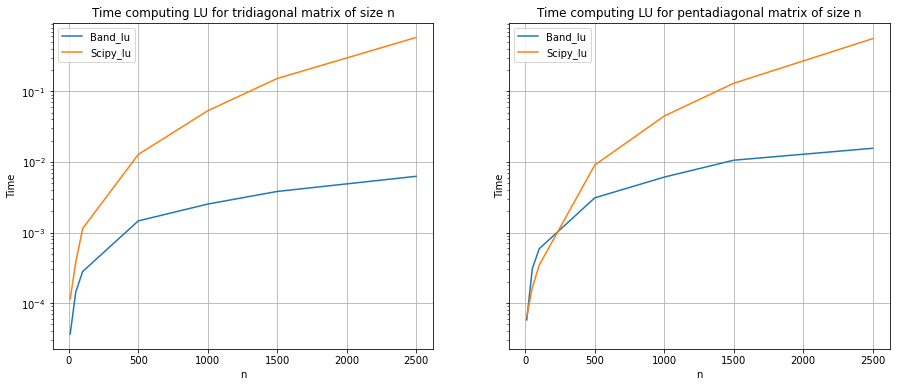

In [5]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (15, 6))

ax1.plot(n, time_3_band, label="Band_lu")
ax1.plot(n, time_3_scipy, label="Scipy_lu")
ax1.legend()
ax1.set_yscale("log")
ax1.grid(True)
ax1.set_title("Time computing LU for tridiagonal matrix of size n")
_ = plt.yticks(fontsize=18)
ax1.set_ylabel("Time")
ax1.set_xlabel("n")

ax2.plot(n, time_5_band, label="Band_lu")
ax2.plot(n, time_5_scipy, label="Scipy_lu")
ax2.legend()
ax2.set_yscale("log")
ax2.grid(True)
ax2.set_title("Time computing LU for pentadiagonal matrix of size n")
_ = plt.yticks(fontsize=18)
ax2.set_ylabel("Time")
ax2.set_xlabel("n")

##### From the plots it can be seen that in both cases, our realization works faster than scipy realization. 
##### For the small $n$ scipy realization works similarly or even faster which could mean that scipy uses quite effective implementation of LU decomposition. Nevertheless, with the increase of $n$ the difference becomes more and more significant.

##### It may be caused by the fact that we apriori know the matrix structure and thus, work only with $O(n)$ elements of the matrix, not wasting time on useless computations with $O(n^2)$ elements like scipy realization does, because it is general for any type of matrices including dense matrices.
##### In general, Band_lu realuzation depends linearly on $n$ (can be easily seen from implementation), whereas for scipy realization time grows non-linearly.

### 2. Stability of LU (8 pts)

Let
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Find analytically LU decomposition with and without pivoting for the matrix $A$.

### Without pivoting

$L_1^{-1}A = 
\begin{pmatrix}
1 & 0 & 0\\
-\dfrac{1}{\varepsilon} & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} $
$\cdot 
\begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix} = 
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & 1 - \dfrac{1}{\varepsilon} & 1 \\
0 & 1 & 1
\end{pmatrix}$

$U = L_2^{-1} L_1^{-1}A = 
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & -\dfrac{\varepsilon}{\varepsilon-1} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & 1 - \dfrac{1}{\varepsilon} & 1 \\
0 & 1 & 1
\end{pmatrix} = 
$$
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & 1 - \dfrac{1}{\varepsilon} & 1 \\
0 & 0 & -\dfrac{1}{\varepsilon-1}
\end{pmatrix}
$

$
L = L_1 L_2 = 
\begin{pmatrix}
1 & 0 & 0\\
-\dfrac{1}{\varepsilon} & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}^{-1}
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & -\dfrac{\varepsilon}{\varepsilon-1} & 1
\end{pmatrix}^{-1} =
\begin{pmatrix}
1 & 0 & 0\\
\dfrac{1}{\varepsilon} & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & \dfrac{\varepsilon}{\varepsilon-1} & 1
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0\\
\dfrac{1}{\varepsilon} & 1 & 0 \\
0 & \dfrac{\varepsilon}{\varepsilon-1} & 1
\end{pmatrix}$

$
A = 
\begin{pmatrix}
1 & 0 & 0\\
\dfrac{1}{\varepsilon} & 1 & 0 \\
0 & \dfrac{\varepsilon}{\varepsilon-1} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & \dfrac{\varepsilon - 1}{\varepsilon} & 1 \\
0 & 0 & -\dfrac{1}{\varepsilon-1}
\end{pmatrix}
$

### With pivoting

##### To do pivoting, we need to permute rows (or columns) of our matrix A in order to maximize diagonal elements $A_{ii}$ that we divide over. Let us consider possible cases:
##### - $\varepsilon \geq 1$ - then we leave A as it is and straightly go to the next step (look at 'Without pivoting')
##### - $\varepsilon < 1$ - then we have to perform pivoting, which means, exchange rows 1 and 2 in our matrix. Now we get the following:
$
A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}
\Rightarrow A_{P} = \begin{pmatrix}
1 & 1 & 1 \\
\varepsilon & 1 & 0\\
0 & 1 & 1
\end{pmatrix}.$
##### and the permutation matrix $P$ in our case:
$P = \begin{pmatrix}
0 & 1 & 0 \\
1 & 0 & 0\\
0 & 0 & 1
\end{pmatrix},$
$A = \begin{pmatrix}
0 & 1 & 0 \\
1 & 0 & 0\\
0 & 0 & 1
\end{pmatrix}
\cdot \begin{pmatrix}
1 & 1 & 1 \\
\varepsilon & 1 & 0\\
0 & 1 & 1
\end{pmatrix}$

##### Let's now find LU for matrix $A_{P}$.
$
L_{1}^{-1} A_{P} = 
\begin{pmatrix}
1 & 0 & 0 \\
-\varepsilon & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
\cdot \begin{pmatrix}
1 & 1 & 1 \\
\varepsilon & 1 & 0\\
0 & 1 & 1
\end{pmatrix}=
\begin{pmatrix}
1 & 1 & 1 \\
0 & 1-\varepsilon & -\varepsilon\\
0 & 1 & 1
\end{pmatrix}
$


$
U = L_{2}^{-1} L_{1}^{-1} A_{P} =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0\\
0 & -\dfrac{1}{1-\varepsilon} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
1 & 1 & 1 \\
0 & 1-\varepsilon & -\varepsilon\\
0 & 1 & 1
\end{pmatrix}= 
\begin{pmatrix}
1 & 1 & 1 \\
0 & 1-\varepsilon & -\varepsilon\\
0 & 0 & \dfrac{1}{1-\varepsilon}
\end{pmatrix}
$

$
L = L_{1} L_{2} =
\begin{pmatrix}
1 & 0 & 0 \\
\varepsilon & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0\\
0 & \dfrac{1}{1-\varepsilon} & 1
\end{pmatrix}=
\begin{pmatrix}
1 & 0 & 0 \\
\varepsilon & 1 & 0\\
0 & \dfrac{1}{1-\varepsilon} & 1
\end{pmatrix}
$

$
A = 
\begin{pmatrix}
0 & 1 & 0 \\
1 & 0 & 0\\
0 & 0 & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
1 & 0 & 0 \\
\varepsilon & 1 & 0\\
0 & \dfrac{1}{1-\varepsilon} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
1 & 1 & 1 \\
0 & 1-\varepsilon & -\varepsilon\\
0 & 0 & \dfrac{1}{1-\varepsilon}
\end{pmatrix}
$

* (3 pts) Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|\varepsilon|\ll 1$ in computer arithmetic?

##### Because if $\varepsilon$ is really close to $0$ and it is a diagonal element, then we have to divide other elements over a small number and get huge numbers. For example, we'll have $\dfrac{1}{\varepsilon}$ in $L$ - really large number.
##### But some operations concerning, for example, summation or division of both huge and small numbers work incorrectly and the precision of small numbers is lost during such operations. This leads to numerically unstable solutions $x$ if we substitute resulting matrices $L$ and $U$ into the system $Ax = b$ as $Ly = b, y = Ux$

### 3. Block LU (10 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.

##### First, for conviniency, let us rename a matrix:
$A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \Rightarrow M = \begin{bmatrix} A & B \\ C & D \end{bmatrix}$
##### and define sizes of blocks as $p \times p$ (for $A$), $p \times q$ (for $B$), $q \times p$ (for $C$), $q \times q$ (for $D$).
##### Now, let's decompose our block matrix $M$. Suppose, we have such LU-factorization of blocks:
$ \begin{bmatrix} A \\ C \end{bmatrix} = \begin{bmatrix} L_1 \\ L_2 \end{bmatrix} U_{1}$

$ L_1 U_2 = B$
##### Then, we can rewrite $M$ as:
$M = \begin{bmatrix}
A & B \\
C & D 
\end{bmatrix} =
\begin{bmatrix} L_1 & 0 \\
L_2 & I_{q-p}
\end{bmatrix}
\begin{bmatrix}
I_p & 0 \\ 0 & \tilde{A}
\end{bmatrix}
\begin{bmatrix}
U_1 & U_2 \\ 
0 & I_{q-p} 
\end{bmatrix} =
\begin{bmatrix}
L_1 U_1 & L_1 U_2 \\ 
L_2 U_1 & L_2 U_2 + \tilde{A} 
\end{bmatrix}$
##### where  $\tilde{A} = D - L_2 U_2 = D - C A^{-1} B$ - is what is called Schur complement of the block $A$ of matrix $M$ (assuming that $A$ is non-singular).
##### Now, let's multiple $M$ from the left  and from the right to lower-triangular matrices:
$M F_1 = 
\begin{bmatrix}
A & B \\
C & D 
\end{bmatrix}
\begin{bmatrix}
I_p & -A^{-1}B \\
0 & I_q 
\end{bmatrix} = 
\begin{bmatrix}
A & 0 \\
C & D - CA^{-1}B 
\end{bmatrix}$

$F_2 M F_1 =
\begin{bmatrix}
I_p & 0 \\
-CA^{-1} & I_q
\end{bmatrix}
\begin{bmatrix}
A & 0 \\
C & D - CA^{-1}B 
\end{bmatrix} =
\begin{bmatrix}
A & 0 \\
0 & D - CA^{-1}B 
\end{bmatrix} = T$

##### Then,
$M = F_2^{-1} T F_1^{-1}$

$F_2^{-1} T F_1^{-1} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}$

$T F_1^{-1} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = F_2 \begin{bmatrix} f_1 \\ f_2 \end{bmatrix},$
##### where
$F_1^{-1} = 
\begin{bmatrix}
I_p & A^{-1}B \\
0 & I_q 
\end{bmatrix}$
##### And now, we get:
$\begin{bmatrix}
A & 0 \\
0 & D - CA^{-1}B 
\end{bmatrix}
\begin{bmatrix}
I_p & A^{-1}B \\
0 & I_q 
\end{bmatrix}
\begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = 
\begin{bmatrix}
I_p & 0 \\
-CA^{-1} & I_q
\end{bmatrix}
\begin{bmatrix} f_1 \\ f_2 \end{bmatrix}
$

$\begin{bmatrix}
A & 0 \\
0 & D - CA^{-1}B 
\end{bmatrix}
\begin{bmatrix} u_1 - A^{-1}B u_2 \\ u_2 \end{bmatrix} = 
\begin{bmatrix} f_1 \\ -CA^{-1}f_1 + f_2 \end{bmatrix}
$
##### Therefore, we get:
$S \ u_2 = \hat{f_2}$,
##### where $S = D - CA^{-1}B$ and $\hat{f_2} =  -CA^{-1}f_1 + f_2$

* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.

##### We will use the fact that:
$det \begin{bmatrix}
A & B \\
0 & C
\end{bmatrix} = 
det \begin{bmatrix}
A & 0 \\
B & C
\end{bmatrix} = det(A) det(C)$
##### and the general property that $det(AB) = det(A) det(B).$

##### Consider such matrix:
$M = \begin{bmatrix}
X & A \\
-B & I
\end{bmatrix}$

##### First, let's find its determinant. To do it we have to convert it to lower triangular or upper triangular form.
$\begin{bmatrix}
I & -A \\
0 & I
\end{bmatrix}
\cdot
\begin{bmatrix}
X & A \\
-B & I
\end{bmatrix} = 
\begin{bmatrix}
X + AB & 0 \\
-B & I
\end{bmatrix}$

##### Here, the equality of determinants looks as follows:
$det(I) \cdot det(M) = det(X+AB) \Rightarrow det(M) = det(X+AB).$

##### Next, according to the Schur complement, let us do the following transformations:
$\begin{bmatrix}
X & A \\
-B & I
\end{bmatrix}
\cdot
\begin{bmatrix}
I & -X^{-1}A \\
0 & I
\end{bmatrix} = 
\begin{bmatrix}
X & 0 \\
-B & BX^{-1}A + I
\end{bmatrix}$

##### And here, the equality of determinants looks as follows:
$det(M) \cdot det(I) = det(X) det(BX^{-1}A + I) \Rightarrow det(M) = det(X) det(BX^{-1}A + I)$
##### Therefore,
$det(X+AB) = det(X) det(BX^{-1}A + I)$

* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

##### Similarly to the previous task, consider the following matrix:
$M = \begin{bmatrix}
I_m & F \\
G & I_n
\end{bmatrix}$

##### First,
$\begin{bmatrix}
I_m & F \\
G & I_n
\end{bmatrix}
\cdot
\begin{bmatrix}
I_m & -F \\
0 & I_n
\end{bmatrix} =
\begin{bmatrix}
I_m & 0 \\
G & I_n - GF
\end{bmatrix}$

$det(M) \cdot det(I) = det(I)det(I_n - GF) \Rightarrow det(M) = det(I_n - GF)$

##### Second,
$\begin{bmatrix}
I_m & -F \\
0 & I_n
\end{bmatrix}
\cdot
\begin{bmatrix}
I_m & F \\
G & I_n
\end{bmatrix} = 
\begin{bmatrix}
I_m - FG & 0 \\
G & I_n
\end{bmatrix}$

$det(I) \cdot det(M) = det(I_m - FG) det(I) \Rightarrow det(M) = det(I_m - FG)$

##### And finally,
$det(I_n - GF) = det(I_m - FG)$

### 4. Efficient implementation of LU decomposition (10 pts)

In the lecture we provide naive implementation of LU factorization with loops and elementwise update of factors. In this subproblem we ask you to provide more efficient implementation of LU factorization and explain how you derive this implementation (main ideas and how you use them in this particular case). 

NumPy or JAX are both ok in this subproblem, but please use the single library for all implementations. 

- (1 pts) Main idea for speed up computation of LU factorization (without using built-in function!)

##### Let's implement LU-factorization using Doolittle algorithm: express matrices $L$ and $U$ explicitly instead of computing in a cycle.

- (4 pts) Implement the presented approach to speed up LU 

In [2]:
import jax.numpy as jnp
import jax
import scipy
from jax.config import config
config.update("jax_enable_x64", True)

In [3]:
def my_lu(A):
    n, _ = A.shape
    
    L = np.zeros((n, n))
    for i in range(0,n):
        L[i][i] = 1
    U = np.zeros((n, n))
    
    for i in range(n):
        U[i, i:] = A[i, i:] - L[i,:i] @ U[:i,i:]
        L[(i + 1):, i] = (A[(i + 1):, i] - L[(i + 1):, :] @ U[:, i]) / U[i, i] 
    return L, U

- (1 pts) Illustrate numerically that your implementation is correct

In [4]:
eps = 1e-4 #1.12e-16
A = np.array([[eps, 1],[1.0, 1]])

L, U = my_lu(A)

t = %timeit -o my_lu(A)
print(t.average)

print('L * U - A:\n', np.dot(L, U) - A)
print(L)
print(U)

49.3 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.933485207142861e-05
L * U - A:
 [[0. 0.]
 [0. 0.]]
[[1.e+00 0.e+00]
 [1.e+04 1.e+00]]
[[ 1.000e-04  1.000e+00]
 [ 0.000e+00 -9.999e+03]]


In [5]:
# From the lecture
eps = 1e-4 #1.12e-16
A = [[eps, 1],[1.0, 1]]
A = jnp.array(A)

def lecture_lu(A):
    n = A.shape[0]
    L = jnp.zeros((n, n))
    U = jnp.zeros((n, n))
    for k in range(n): #Eliminate one row
        L = jax.ops.index_update(L, jax.ops.index[k, k], 1)
        for i in range(k+1, n):
            L = jax.ops.index_update(L, jax.ops.index[i, k], A[i, k] / A[k, k])
            for j in range(k+1, n):
                A = jax.ops.index_add(A, jax.ops.index[i, j], -L[i, k] * A[k, j])
        for j in range(k, n):
            U = jax.ops.index_update(U, jax.ops.index[k, j], A[k, j])
    return L, U

L, U = lecture_lu(A)
t = %timeit -o lecture_lu(A)
print('Lectures version: ', t.average)
print('L * U - A:\n', jnp.dot(L, U) - A)

43.9 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Lectures version:  0.04394528551428526
L * U - A:
 [[0. 0.]
 [0. 0.]]


- (2 pts) Provide the comparison of running time of naive implementation from the lecture, your implementation and NumPy built-in function for range of matrix dimensions. We expect you plot the running time vs matrix dimension for these implementations. So you should get the plot with three lines.

In [6]:
n_range = [3, 5, 10, 15, 20, 35, 50, 60]
time_lecture = np.zeros(len(n_range))
time_my_lu = np.zeros(len(n_range))
time_scipy = np.zeros(len(n_range))
    
for i in range(len(n_range)):
    A = np.random.randint(1, 10, size=(n_range[i], n_range[i]))
                                                        
    t = %timeit -o lecture_lu(A)
    time_lecture[i] = t.average
    
    t = %timeit -o my_lu(A)
    time_my_lu[i] = t.average
    
    t = %timeit -o scipy.linalg.lu(A)
    time_scipy[i] = t.average

115 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
67.8 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
30.9 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
499 ms ± 95.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
131 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42.4 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.97 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
193 µs ± 786 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
39.3 µs ± 709 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
9.55 s ± 87.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
291 µs ± 3.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
56.2 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
25.7 s ± 1.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
389 µs ± 947 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
63.9 

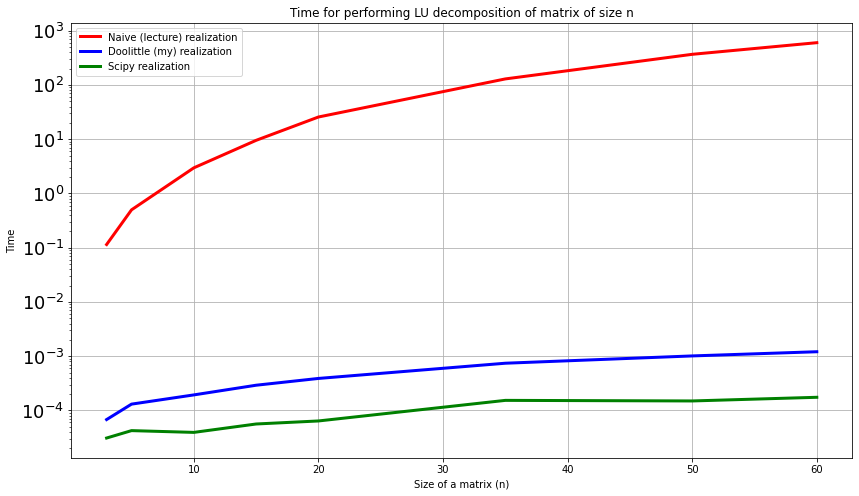

In [7]:
plt.figure(figsize = (14,8))
plt.plot(n_range, time_lecture, lw = 3, label = 'Naive (lecture) realization', color = 'r')
plt.plot(n_range, time_my_lu, lw = 3, label = 'Doolittle (my) realization', color = 'b')
plt.plot(n_range, time_scipy, lw = 3, label = 'Scipy realization', color = 'g')
plt.legend()
plt.xlabel("Size of a matrix (n)")
plt.ylabel("Time")
plt.yscale('log')
plt.title("Time for performing LU decomposition of matrix of size n")
plt.grid(True)
_ = plt.yticks(fontsize=18)
plt.show()

- (2 pts) Discuss the obtained results and explain what other tricks are possible to accelerate computing the LU factorization. 

##### We can see significant increase in time of our version work compared to the lecture naive implementation. 
##### Still, realization in Scipy works faster. 
##### 1. There is also a note that we didn't use pivoting in Doolittle algorithm, so if there are small elements on the diagonal, we can obtain large values. With additional use of pivoting, we can avoid this problem.

##### 2. For more effective implementation Cython may be used since it helps accelerate computations with translating code in Python into C and provising functional in Python.
##### 3. Block LU decomposition can also be implemented using recursion (though I can't say anything certain about its performance)
##### 4. More effective usage of in-built functional (for example, if possible, use iterators instead of cycles)

## Problem 2 (eigenvalues)  55 pts

### 1. Theoretical tasks (10 pts)

* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real.

$\Rightarrow$
##### First, prove that if a matrix is Hermitian then its eigenvalues are real.
##### From the lectures we know a theorem that any normal matrix is diagonalizable:
$AA^* = A^*A \Leftrightarrow A = U \Lambda U^*,$
##### where $U$ is unitary and $\Lambda$ is diagonal.
##### Now, let us show that eigenvalues of matrix $\Lambda$ and matrix $A$ coincide:
$det(A - \lambda I) = det(U \Lambda U^* - \lambda I) = det(U) det(\Lambda - \lambda I) det(U^*) = det(\Lambda - \lambda I)$
##### But since $\Lambda$ is diagonal, then it's eigenvalues are its diagonal (and the only non-zero!) elements, so diagonal elements of $\Lambda$ are the eigenvalues of matrix $A$.
##### Now, let us use the fact that $A$ is Hermitian, which means:
$A = A^*$ and  $A^* = U \Lambda^* U^* \Rightarrow U \Lambda U^* = U \Lambda^* U^* \Rightarrow U^* U \Lambda U^*U = U^* U \Lambda^* U^* U \Rightarrow \Lambda = \Lambda^* \Rightarrow \forall i\ \lambda_i = \overline{\lambda_i} \Rightarrow \forall i\ \lambda_i \in \mathbb{R} $

$\Leftarrow$
##### Second, to prove that if the eigenvalues of a matrix are real then it is Hermitian we may just reverse the order of the conclusions in the previous row. It can be done as all of them are equivalent:
$ \forall i\ \lambda_i \in \mathbb{R} \Rightarrow \forall i\ \lambda_i = \overline{\lambda_i} \Rightarrow \Lambda = \Lambda^*.$
##### Here, matrix $\Lambda$ is diagonal matrix with eigenvalues on the diagonal. But we know that every normal matrix is diagonalizable, so it can be represented as:
##### $A = U D U^*$ and $A^* = U^* D^* U$
##### Here, matrix $D$ is diagonal and has the same eigenvalues as matrix $A$ (proved above), therefore, it has to be $D = \Lambda$. But $\Lambda = \Lambda^*$, therefore, $A = A^*$ and $A$ is Hermitian.

* Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

$\Rightarrow$
##### $A$ is normal and unitary, therefore, $A A^* = A^* A = I$. Also, since $A$ is normal, it is diagonalizable and:
$A = U \Lambda U^*, A^* = U \Lambda^* U^*$

$A^*A = U \Lambda^* U^* U \Lambda U^* = U \Lambda^* \Lambda U^* = I$

$AA^* =  U \Lambda U^* U \Lambda^* U^* = U \Lambda \Lambda^* U^* = I \Rightarrow \Lambda \Lambda^* = U^* U = I$
##### $\Lambda$ is diagonal, so $\Lambda \Lambda^*$ is also diagonal and 

$\forall i \ \lambda_{i} \overline{\lambda_i} = 1 \Rightarrow \forall i \ |\lambda_i| = 1$

$\Leftarrow$
##### If $\forall i \ |\lambda_i| = 1$, then $\Lambda \Lambda^* = \Lambda^* \Lambda = I$ 
##### Again, since matrix $A$ is normal, it is diagonalizable:
$A = U \Lambda U^*,\ A^* = U \Lambda^* U^* \Rightarrow A A^* = U \Lambda U^* U \Lambda^* U^* = U \Lambda \Lambda^* U^* = U U^* = I$
##### In the same way,
$A^* A = U \Lambda^* U^* U \Lambda U^* = U \Lambda^* \Lambda U^* = U U^* = I$

##### $A A^* = A^* A = I \Rightarrow$ $A$ is unitary.

* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

##### Let us denote eigenvalues as $\mu$ for this example. Now, eigenvalues of the perturbed Jourdan block are:
$$
    J(\varepsilon) - \mu I = 
    \begin{bmatrix} 
     \lambda - \mu & 1 & 0 & ... & 0 \\ 
     0 & \lambda - \mu & 1 & ... & 0 \\ 
     ... & ...& ... & ... & 0 \\ 
     ... & ... & ... & \lambda - \mu & 1 \\ 
     \varepsilon & 0 & ... & 0 & \lambda - \mu  \\ 
    \end{bmatrix}_{n\times n}
$$

$det(J(\varepsilon) - \mu I) = (\lambda - \mu)^n + \varepsilon = 0 \Rightarrow \lambda - \mu = \{ \sqrt[n]{- \varepsilon} \} $

$\lambda - \mu_k =  \sqrt[n]{|\varepsilon|} \exp^{\dfrac{i(arg(\varepsilon) + 2\pi k)}{n}} = \sqrt[n]{|\varepsilon|} \exp^{\dfrac{2\pi k i}{n}}, k \in \{0, .. n-1 \}$

$\mu_k = \lambda - \sqrt[n]{|\varepsilon|} \exp^{\dfrac{2\pi k i}{n}}$

##### For $\varepsilon =  0$ $J(0)$ has only 1 eigenvalue: $\lambda$ of multiplicity $n$.
##### With enlarging $n$ we have $\sqrt[n]{|\varepsilon|} \rightarrow 1$, so the module of deviation from $\lambda$ goes to 1 and $\mu_k$ goes to $\lambda - 1$. It is quite large error for not too high numbers. But what is interesting is that the error depends weakly on $\varepsilon$ with large $n$ and with even a very small perturbation eigenvalues of a large matrix woud be shifted from the true value to approximately $1$.

### 2. PageRank (35 pts)


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

In [2]:
import scipy.sparse as spr
from scipy.sparse.linalg import svds

In [3]:
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
def pagerank_matrix(G):
    sum_rows = G.sum(axis=1)
    sum_rows[sum_rows == 0] = 1
    
    if (spr.issparse(G)):
        #sparse matrix (scipy)
        diag = spr.lil_matrix((sum_rows.shape[0], sum_rows.shape[0]))
        diag.setdiag(1/sum_rows)
        A = G.T * diag
    else:
        #dense matrix
        A = G.T / sum_rows
        
    return A

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


In [4]:
G = np.array([[0, 1, 0, 0, 0], 
              [0, 0, 1, 0, 0], 
              [1, 1, 0, 0, 0], 
              [0, 0, 0, 0, 1], 
              [0, 0, 0, 1, 0]])
A_pagerank = pagerank_matrix(G)
print(A_pagerank)

[[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  1.  0. ]]


In [5]:
eig_value, _ = np.linalg.eig(A_pagerank)
print('Largest eigenvalue is: ', np.abs(eig_value.max()))

Largest eigenvalue is:  1.0000000000000004


In [6]:
eig_value

array([-0.5+0.5j, -0.5-0.5j,  1. +0.j ,  1. +0.j , -1. +0.j ])

##### From the list of eigen values one can see that the multiplicity of largest eigenvalue (which is $1$) is $2$.

* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

In [38]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l-float, res-np.ndarray(of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter = 30): # 5 pts
    x = x0 / np.linalg.norm(x0)
    res = np.zeros(num_iter + 1)
    res[0] = np.linalg.norm(x)#np.linalg.norm(x)
    for i in range(num_iter):
        x = np.dot(A, x)
        x /= np.linalg.norm(x)
        l = np.dot(np.dot(A, x), x)
        res[i+1] = np.linalg.norm(np.dot(A, x) - l * x)
    return x, l, res

Making sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

In [39]:
A = np.array([[2, -1], [-1, 2]])
x0 = np.random.uniform(0, 10, size=2) #[0, 1]
x, l, res = power_method(A, x0)
print(x, l)

[-0.70710678  0.70710678] 3.0000000000000004


* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


In [98]:
#x0 = np.random.rand(5) #np.random.uniform(0, 10, size=5)
#num_iter = 100
#x, l, res_A = power_method(A_pagerank, x0, num_iter)
#print(x, l)

[0.27642591 0.55285183 0.55285183 0.13428698 0.54246238] 0.8333928410829985


In [45]:
x0 = np.random.rand(5) #np.random.uniform(0, 10, size=5)
num_iter = 100
x, l, res_A = power_method(A_pagerank, x0, num_iter)
print(x, l)

[0.2046775  0.40935501 0.40935501 0.76547526 0.19238425] 0.6715666970669435


In [46]:
print("Ploting power method for matrix pagerank, maximum eigenvalue is:", l, ", true max eigenvalue = 1.")

Ploting power method for matrix pagerank, maximum eigenvalue is: 0.6715666970669435 , true max eigenvalue = 1.


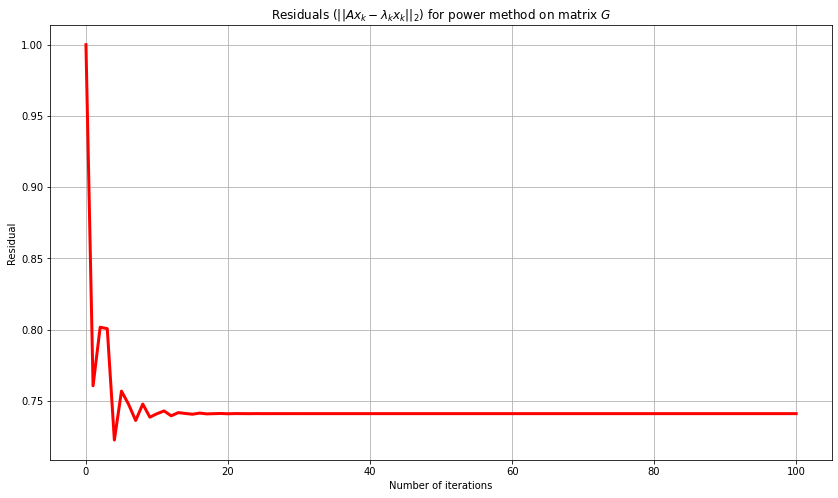

In [47]:
plt.figure(figsize = (14,8))
plt.plot(range(101), res_A, lw = 3, color = 'r')
plt.xlabel("Number of iterations")
plt.ylabel("Residual")
plt.title("Residuals ($||Ax_k - \lambda_k x_k||_2$) for power method on matrix $G$")
plt.grid(True)
plt.show()

#### The absence of convergence.
##### As we know, the convergence for power method is geometric $($~$ q^k$, where $k$ - number of iteration, $q = \dfrac{|\lambda_2|}{|\lambda_1|}$). But as we've already seen, for this matrix first two eigenvalues are equal to $1$ (with multiplicity $2$) and $-1$ . So, in our case $q = \dfrac{|-1|}{|1|} = 1$, that's why we can't promise any convergence for this matrix.

* (2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence.

[0.25472981 0.50945963 0.50945963 0.28844913 0.57689826] 1.0


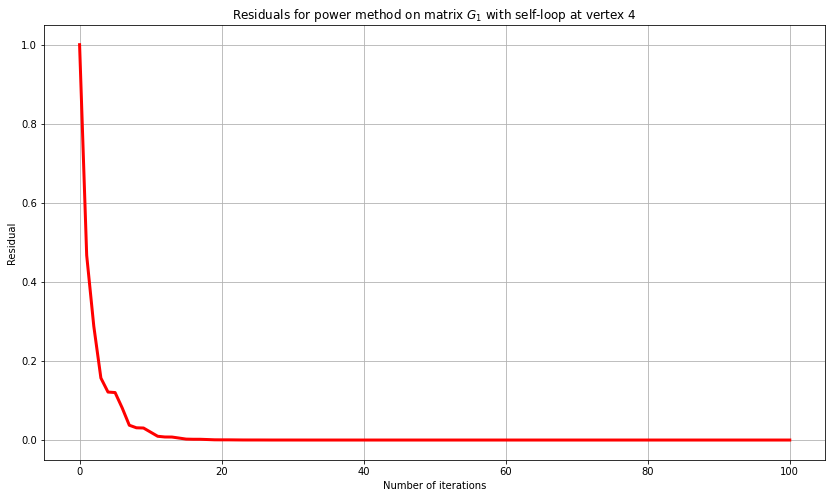

In [48]:
G_1 = np.array([[0, 1, 0, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 0, 0, 0],
                [0, 0, 0, 0, 1],
                [0, 0, 0, 1, 1]])

A_pagerank_1 = pagerank_matrix(G_1)
#print(A_pagerank_1)

x0 = np.random.rand(5)
num_iter = 100
x, l, res_A_1 = power_method(A_pagerank_1, x0, num_iter)
print(x, l)

plt.figure(figsize = (14,8))
plt.plot(range(101), res_A_1, lw = 3, color = 'r')
plt.xlabel("Number of iterations")
plt.ylabel("Residual")
plt.title("Residuals for power method on matrix $G_1$ with self-loop at vertex 4")
plt.grid(True)
plt.show()

In [49]:
A_pagerank_1 = pagerank_matrix(G_1)
print(A_pagerank_1)
eig_values, _ = np.linalg.eig(A_pagerank_1)
print(eig_values)

[[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5]
 [0.  0.  0.  1.  0.5]]
[-0.5+0.5j -0.5-0.5j  1. +0.j  -0.5+0.j   1. +0.j ]


##### We can see that for this pagerank matrix first and second eigenvalues are different in modulus $(q \approx \dfrac{0.7}{1} = 0.7)$, so in this case there is a convergence. And the largest eigenvalue, computed by power method, is really close to the real value, which is $1$. 

 Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?

In [50]:
for i in range(10):
    x0 = np.random.rand(5)
    num_iter = 100
    x, l, res_A_1 = power_method(A_pagerank_1, x0, num_iter)
    print("Iteration", i, "eigenvector:", x)

Iteration 0 eigenvector: [0.27726396 0.55452793 0.55452793 0.24824272 0.49648545]
Iteration 1 eigenvector: [0.25527811 0.51055623 0.51055623 0.2875753  0.57515059]
Iteration 2 eigenvector: [0.04377451 0.08754902 0.08754902 0.44334053 0.88668106]
Iteration 3 eigenvector: [0.30186917 0.60373833 0.60373833 0.1896708  0.37934159]
Iteration 4 eigenvector: [0.21995414 0.43990828 0.43990828 0.33603023 0.67206047]
Iteration 5 eigenvector: [0.23092046 0.46184093 0.46184093 0.32251563 0.64503126]
Iteration 6 eigenvector: [0.2759526  0.5519052  0.5519052  0.25085911 0.50171822]
Iteration 7 eigenvector: [0.12411609 0.24823217 0.24823217 0.41505585 0.83011169]
Iteration 8 eigenvector: [0.32887948 0.65775896 0.65775896 0.07286231 0.14572462]
Iteration 9 eigenvector: [0.21223653 0.42447306 0.42447306 0.34484805 0.6896961 ]


##### Though in this case we observe the convergence of approximated eigenvalue to the true value, the resulting eigenvectors don't converge to the same eigenvector. They are different and depend on the initial guess.
##### This is because of the multiplicity of largest eigenvalue equal to $2$. So, we have two different true eigenvectors and each of our  approximated eigenvectors converge to some linear combination of them, different each time.

In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.


In [51]:
d = 0.97
N = A_pagerank_1.shape[0]

A_d = d * A_pagerank_1 + (1 - d) / N * np.ones(N)
x0 = np.random.rand(5)
num_iter = 100
x, l, res_A_d = power_method(A_d, x0, num_iter)
print(x, l)

[0.2589863  0.51014945 0.50759442 0.29156253 0.57446744] 0.9999943041099957


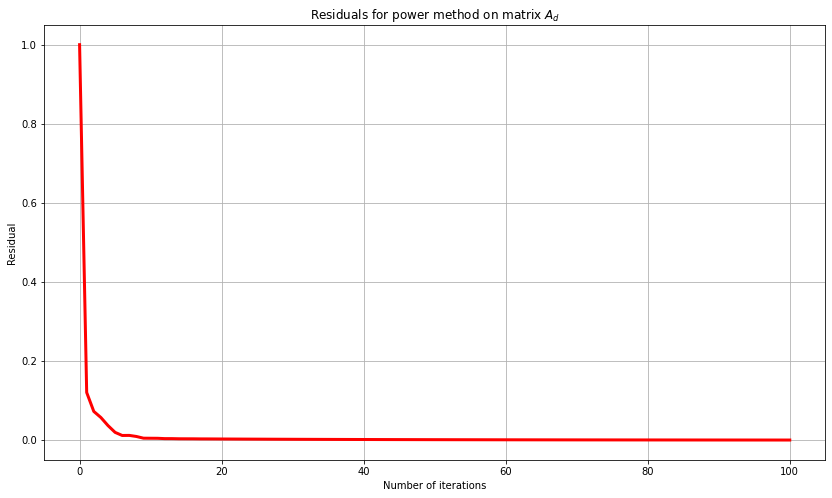

In [52]:
plt.figure(figsize = (14,8))
plt.plot(range(101), res_A_d, lw = 3, color = 'r')
plt.xlabel("Number of iterations")
plt.ylabel("Residual")
plt.title("Residuals for power method on matrix $A_d$")
plt.grid(True)
plt.show()

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

In [32]:
eig_values, _ = np.linalg.eig(A_d)
print(eig_values)
eig_values = np.sort(abs(eig_values.real))[-2]
print('Second largest real eigenvalue:' , eig_values)

[-0.485+0.485j -0.485-0.485j  1.   +0.j     0.97 +0.j    -0.485+0.j   ]
Second largest real eigenvalue: 0.9700000000000001


##### Second eigenvalue is less or equal $d$ when matrix $A_d$ is defined as above (proofs for the similar matrix type is here: http://ilpubs.stanford.edu:8090/582/1/2003-20.pdf). But for our case it is observed to be even equal to $d$ and it's quite logical according to the formula of $A_d$ (which also corresponds to the theorem in the source, because initial matrix from which we obtained pagerank contains two components and safisfies conditions of theorem 2).
##### Therefore, the less we take $d$, the faster the convergence should be. But $d$ should not be too small because then the structure of the initial matrix $A$ is completely lost and the resulting matrix will become closer to the matrix with all elements equal.

##### The convergence in our case is equal to $d < 1$.

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

In [53]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    y = A @ (d*x)
    y += (1-d) / A.shape[0] * np.sum(x)
    return y

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [34]:
index_nonzero = np.random.randint(1,1000, size = (100,2))
A_sparse = spr.csr_matrix((np.ones(100),(index_nonzero[:,0],index_nonzero[:,1])),
                          shape=(10000,10000),dtype="float64")
x = np.random.uniform(0,100, size=(10000,1))

d = 0.97
A_sparse_ = np.zeros((10000,10000))
A_sparse_[index_nonzero[:,0],index_nonzero[:,1]] = 1

##### Checking performance

In [35]:
sum(pagerank_matvec(A_sparse,d,x) - (d*A_sparse_+(1-d)/A_sparse_.shape[0]*np.ones(A_sparse_.shape)).dot(x))

array([-1.16910925e-11])

#####  pagerank_matvec performance 

In [36]:
%timeit pagerank_matvec(A_sparse,d,x)

73.7 µs ± 3.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


##### Direct evaluation of $A_dx$

In [37]:
%timeit (d*A_sparse_+(1-d)/A_sparse_.shape[0]*np.ones(A_sparse_.shape)).dot(x)

639 ms ± 47.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### We can observe that pagerank_matvec is faster.

#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.

In [54]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors

G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [55]:
print("Density of the weighted adjacency matrix =", G.getnnz() / (G.shape[0] * G.shape[1]))

Density of the weighted adjacency matrix = 4.4986518152305776e-05


In [56]:
summ = G.sum(axis = 0)
auth = np.argsort(summ[0, :])[0, -10:]
print("TOP-10 most cited authors:")
print(authors[auth][0])

TOP-10 most cited authors:
['David G. Lowe' 'David E. Culler' 'Ion Stoica' 'Jitendra Malik'
 'Cordelia Schmid' 'Anil K. Jain' 'Jiawei Han' 'Hari Balakrishnan'
 'Andrew Zisserman' 'Scott Shenker']


In [57]:
G[G != 0] = 1
A_dblp = pagerank_matrix(G)
print(A_dblp.shape)

(1766547, 1766547)


In [58]:
#A_dblp = pagerank_matrix(G)
sum_ = np.array(A_dblp.sum(axis = 0), dtype = int).reshape(-1)

#Verufy that stochastic
print('Is stochastic:', np.all(sum_[sum_ > 0] == 1))

Is stochastic: True


* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).

* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.

In [60]:
def power_method_1(A, d, x0, num_iter = 30): # 5 pts
    x = x0 / np.linalg.norm(x0)
    res = np.zeros(num_iter + 1)
    res[0] = np.linalg.norm(x)#np.linalg.norm(x)
    for i in range(num_iter):
        x = pagerank_matvec(A, d, x)
        x /= np.linalg.norm(x)
        Ax = pagerank_matvec(A, d, x)
        l = np.dot(Ax, x)
        res[i+1] = np.linalg.norm(Ax - l * x)
    return x, l, res

In [61]:
#L = spr.linalg.LinearOperator(A_dblp.shape, matvec = lambda x, A = A_dblp, d = 0.85: pagerank_matvec(A, d, x))
d = 0.85
x0 = np.array([1 for i in range(A_dblp.shape[0])])#.reshape(A_dblp.shape[0], 1)
x, l, res_dblp = power_method_1(A_dblp, d, x0, num_iter=100)

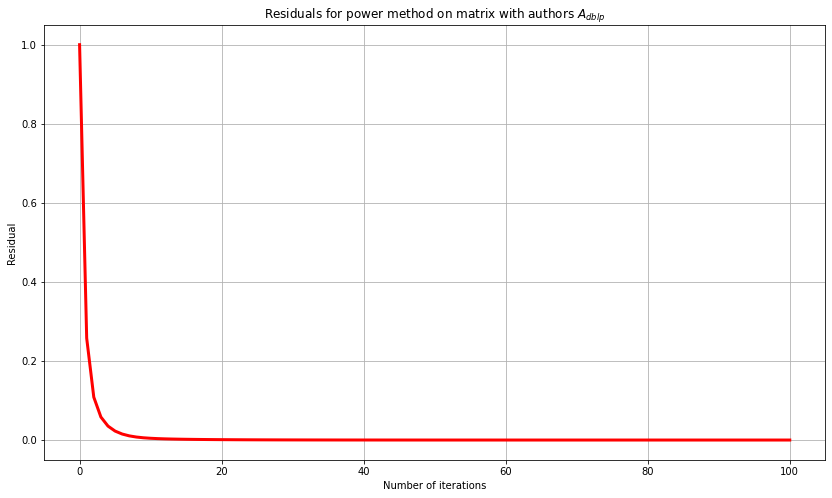

In [66]:
plt.figure(figsize = (14,8))
plt.plot(range(101), res_dblp, lw = 3, color = 'r')
plt.xlabel("Number of iterations")
plt.ylabel("Residual")
plt.title("Residuals for power method on matrix with authors $A_{dblp}$")
plt.grid(True)
plt.show()

In [73]:
print('Largest eigenvalue for the matrix', l)

Largest eigenvalue for the matrix 0.962349499555062


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

In [90]:
auth = np.argsort(x)[-10:]
print("TOP-10 most cited authors accoeding to PageRank:")
print(authors[auth])

TOP-10 most cited authors accoeding to PageRank:
['Gerard Salton' 'Robert Endre Tarjan' 'Alfred V. Aho' 'Takeo Kanade'
 'Anil K. Jain' 'Ronald L. Rivest' 'Azriel Rosenfeld' 'John E. Hopcroft'
 'Richard M. Karp' 'David E. Goldberg']


### 3. QR algorithm (10 pts)

* Implement QR-algorithm without shifting. Prototype of the function is given below

In [145]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True)

In [146]:
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    Ak = A_init
    convergence = np.zeros(num_iter,)
    for i in range(num_iter):
        q, r = jnp.linalg.qr(Ak)
        Ak = jnp.dot(r, q)
        convergence[i] = np.max([np.abs(Ak[i, j]) for i in range(Ak.shape[0]) for j in range(i)])
    return Ak, convergence

#### Symmetric case (3 pts)
- Create symmetric tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops.
- Run $400$ iterations of the QR algorithm for this matrix.
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

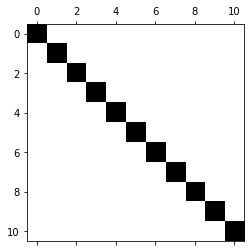

In [147]:
n = 11
d = jnp.array([2 for _ in range(n)])
sub_diag = jnp.array([-1 for _ in range(n-1)])

qr_mat = jnp.diag(d) + jnp.diag(sub_diag, -1) + jnp.diag(sub_diag, 1)
Ak, conv = qr_algorithm(qr_mat, num_iter=400)
plt.spy(Ak, precision=1e-7)

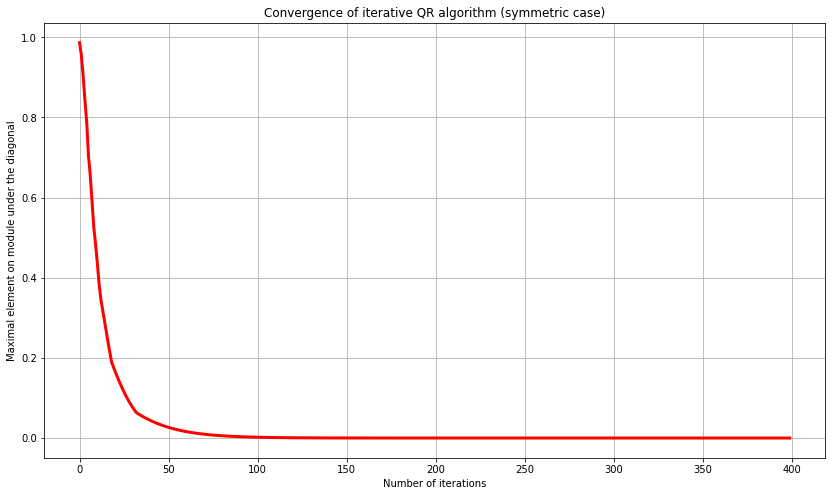

In [154]:
plt.figure(figsize = (14,8))
plt.plot(range(400), conv, lw = 3, color = 'r')
plt.xlabel("Number of iterations")
plt.ylabel("Maximal element on module under the diagonal")
plt.title("Convergence of iterative QR algorithm (symmetric case)")
plt.grid(True)
plt.show()

#### Nonsymmetric case (4 pts)

- Create nonsymmetric tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops.
- Run $250$ iterations of the QR algorithm for this matrix.
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?

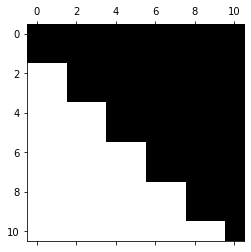

In [149]:
n = 11
d = jnp.array([3 for _ in range(n)])
sub_diag = jnp.array([5 for _ in range(n-1)])
upper_diag = jnp.array([-2 for _ in range(n-1)])

qr_mat_2 = jnp.diag(d) + jnp.diag(sub_diag, -1) + jnp.diag(upper_diag, 1)
Ak_2, conv_2 = qr_algorithm(qr_mat_2, num_iter=250)
plt.spy(Ak_2, precision=1e-7)

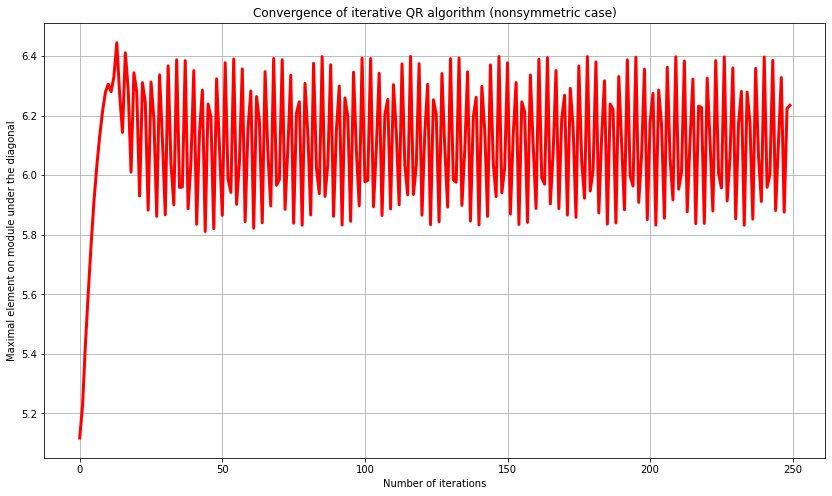

In [153]:
plt.figure(figsize = (14,8))
plt.plot(range(250), conv_2, lw = 3, color = 'r')
plt.xlabel("Number of iterations")
plt.ylabel("Maximal element on module under the diagonal")
plt.title("Convergence of iterative QR algorithm (nonsymmetric case)")
plt.grid(True)
plt.show()

In [150]:
eig_value, _ = np.linalg.eig(qr_mat_2)
print(np.sort(np.abs(eig_value)))

[3.         3.41752717 3.41752717 4.35889894 4.35889894 5.38516481
 5.38516481 6.244998   6.244998   6.80591714 6.80591714]


##### This matrix isn't lower triangular. 
##### QR algorithm doesn't converge in this case, as can be seen from the plot. We know that it happens since 'convergence of QR algorithm is a delicate issue'

## Problem 3. (Pseudo-Schur decomposition) 15 pts
Let's redefine scalar product $ \forall x, y \in \mathbb{C}^n$ in a following way:

$$ [x,y]_J = y^{*}Jx, \text{s.t.}\ J = \text{diag}(j_{11}, j_{22}, \dots, j_{nn})\ \text{and}\ j_{ii} = \pm1\ \forall i \in [1,n].$$

Denote rows of matrix $V \in \mathbb{C}^{n \times n}$ as $v_1, v_2, \dots, v_n$. Then $V$ is called $\textbf{J-orthonormal}$ iff 

$$[v_i, v_k]_J = \pm \delta_{ik}.$$

We will call matrix $T \in \mathbb{C}^{n \times n}$ $\textbf{almost triangular}$ iff $T$ is upper triangular with diagonal blocks of order $1$ or $2$.

Matrix $A \in \mathbb{C}^{n \times n}$ is said to be $\textbf{J-decomposable}$ if exist J-orthonormal matrix $V$ and upper triangular matrix $T$ such that 


$$A = V T V^{-1}.$$

Matrix $A \in \mathbb{C}^{n \times n}$ is said to have $\textbf{pseudoschur J-decomposition}$ if exist J-orthonormal matrix $V$ and almost triangular matrix $T$ such that


$$A = V T V^{-1}.$$

This problem is to get familiar with the fact that two abovementioned decompositions exist not for any square matrix with complex entries.




- (2 pts) $A$ has pseudoschur J-decomposition $A = V T V^{-1}, \ \text{where}\ V = \begin{bmatrix} v_1 & v_2 &  \ldots & v_n \end{bmatrix}, \ T = \begin{bmatrix} T_{ij} \end{bmatrix}$ and $v_1$ is $\textbf{not}$ an eigenvector of $A$. Show that $T_{21} \ne 0$. 


##### Since we know that $v_1$ is not an eigenvector of $A$, therefore:
$\nexists\ \lambda: VTV^{-1} v_1 = \lambda v_1$
##### Let's multiply it to $V^{-1}$ to the left:
$\nexists\ \lambda: TV^{-1} v_1 = \lambda V^{-1} v_1$
##### From $V^{-1}V = I$ we get that $V^{-1} v_1 = e_1 = (1, 0, ..., 0)^T$
##### Then:
$\nexists\ \lambda:
\begin{pmatrix}
T_{11} && T_{12} && T_{13} && ... && T_{1n} \\
T_{21} && T_{22} && T_{23} && ... && T_{2n} \\
0 && T_{32} && T_{33} && ... && T_{3n} \\
... && ... && ... && ... && ... \\
0 && 0 && 0 && ... && T_{nn} \\
\end{pmatrix}
\begin{pmatrix}
1\\0\\0\\...\\0
\end{pmatrix} = 
\begin{pmatrix}
\lambda\\0\\0\\...\\0
\end{pmatrix}$

$\nexists\ \lambda:
\begin{pmatrix}
T_{11}\\T_{21}\\0\\...\\0
\end{pmatrix} = 
\begin{pmatrix}
\lambda\\0\\0\\...\\0
\end{pmatrix}$
##### So we can only avoid this equality if $T_{21} \neq 0$

- (5 pts) Given $J = \text{diag}(1, -1)$ and $A = \begin{bmatrix}
3   \ -1\\
-1\   \ 3\\
\end{bmatrix}$, prove that $A$ is not J-decomposable.


##### First, eigenvalues of $A$ are $2$ and $4$ and eigenvectors are $(1, 1)^T$ and $(1, -1)^T$. 
##### Let's suppose that $A$ is decomposable and express equation with some of its eigenvector $a$ ($a$ is either $(1, 1)^T$ or $(1, -1)^T$):
$VTV^{-1} a = \lambda a$
##### Multiply to $V^{-1}$:
$TV^{-1}a = \lambda V^{-1} a$
##### So, eigenvalues of $T$ are same as for $A$ and equal to $2$ and $4$. Moreover, its eigenvectors will be equal to corresponding $V^{-1} a$.
$T = \begin{pmatrix}
t_1 && t_2\\
0 && t_3
\end{pmatrix}, 
t_1 = 2, t_3 = 4 \text{ or } t_1 = 4, t_3 = 2.$
### First way:
#### But we also  know that:
$det(A) = det(VTV^{-1}) = det(T) = 10$
##### But we already know from eigenvalues of $T$ that $det(T) = 8$. We came to contradiction with this decomposition.

### Second way:
##### For $T$ we get two eigenvectors: $(u, 0)^T, u \neq 0$, $(\dfrac{t_2}{2}, 1)^T \text{ or } (-\dfrac{t_2}{2}, 1)^T$ depending on the diagonal of $T$. 
##### For the first eigenvector we have:
$V^{-1} = \begin{pmatrix}
u_1 && u_2\\
u_3 && u_4
\end{pmatrix}, u_3 + u_4 = 0 \text{ or } u_3 - u_4 = 0$.
##### Let us express initial matrix $V$, then:
$V^{-1} V = I$

$\begin{pmatrix}
u_1\\ u_2
\end{pmatrix}
\begin{pmatrix}
v_1&& v_2
\end{pmatrix} = I, u_2 = (x, x)^T \ or\ (x, -x)^T.$
##### Since $(u_2, v_1) = 0, (u_2, v_2) = 1$, then $V$ has one of the following forms:
$V = \begin{pmatrix}
a && b\\
a && b - \dfrac{1}{x}
\end{pmatrix}$

$V = \begin{pmatrix}
a && b\\
-a && \dfrac{1}{x} - b
\end{pmatrix}$

##### If we use the property of J-orthonormality of rows of $V$, we'll get incompatible system of equations for $a$ and $b$.
##### For the first option of $V$ the system is:
$a^2 - b^2 = \pm 1$

$a^2 - (b - 1/x)^2 = \pm 1$

$a^2 - b(b - 1/x) = 0$

##### There have to be different signs in first two equations, for example, $+$ for the first and $-$ for the second. From these equations we get:
$x = \dfrac{-b \pm \sqrt{b^2 + 2}}{2},$
##### but from the first and third we obtain $b = -x$.
##### So, we cannot find such matrix $V$ to make decomposition $A = VTV^{-1}$ possible.

- (8 pts) Given that $A \in \mathbb{C}^{n \times n}$ is diagonalizable, show that it has pseudoschur J-decomposition for any $J$ of form $J=\text{diag}(\pm 1, \dots, \pm 1)$.
Note that in order to solve that subproblem you should firstly prove the following fact:

    Let $S \in \mathbb{C}^{m \times n},\ m \ge n,\ J = \text{diag}(\pm 1).$ If $A = S^{*}JS$ and $det(A) \ne 0$, then exists QR decomposition of $S$ with respect to $J$: 
    $$S = P_1 QR P_2^{*} = P_1 Q \begin{bmatrix} R_1 \\ 0 \end{bmatrix} P_2^{*}, \ Q^{*} J^{'}Q = J^{'}, \ J^{'} = P_1^{*}JP_1,$$ where $P_1$ and $P_2$ are permutation matrices, $Q$ is called $J^{'}$- unitary and $R_1$ is almost triangular.

## Problem 4. (Skeleton decomposition) 28 pts

The application that we are particularly interested in is
the approximation of a given matrix by a low-rank matrix:

$$ A \approx UV^T, A \in \mathbb{R}^{m \times n}, U \in \mathbb{R}^{m \times r}, V \in \mathbb{R}^{n \times r}.$$

It is well known that the best (in any unitary invariant norm) low-rank approximation can be computed via singular value decomposition (SVD). As an alternative, we can consider skeleton decompostion of the form:

$$A \approx A_r = A(: , \mathcal{J})A(\mathcal{I} , \mathcal{J})^{-1}A(\mathcal{I} , :),$$
where $\mathcal{I,J}$ are some index sets of length $r$.

Below we consider the matrix $N \times N$ derived from the following function discretization in the uniform grid in square $[0, 1] \times [0, 1]$:
$ f(x, y) = \exp(-\sqrt{x^2 + y^2})$.
It means that $A = [a_{ij}]$, where $a_{ij} = f(x_i, x_j)$ and $x_i = i / (N-1)$, $x_j = j / (N-1)$, where $i, j = 0,\ldots, N-1$.

- (2 pts) compose this matrix for $N = 5000$ without loops (Hint: function ```np.meshgrid``` can help you)


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def f(x, y):
    return np.exp(-np.sqrt(x**2 + y**2))

In [37]:
n = 5000
#grid_x = np.arange(0, 1, 5000)
grid = np.linspace(0, 1, 5000)
xx, yy = np.meshgrid(grid, grid)
A = f(xx, yy)

- (3 pts) Compute Skeleton approximation with random selection of rows and columns indices for $r = 5$ (check that submatrix in the intersection of rows and columns is nonsingular). Average the relative error $\frac{\|A - A_r \|_F}{\|A\|_F}$ over $M$ samples of column/row indices. Check that $M$ is sufficiently large to provide stable mean.

 Note: extracting submatrices should be done according to ```numpy```  e.g. ```A[index_set, :]``` to extract selected rows, ```A[:, index_set]``` to extract selected columns etc..


In [38]:
def is_invertible(a):
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

In [52]:
r = 5
M = 100
relative_error = np.zeros(M)
rel_error = 0.

for i in range(M):
    is_non_singular = False
    while (is_non_singular == False):
        indexes = np.random.choice(A.shape[0], size = (r, 2), replace=False)
        if (is_invertible(A[indexes[:, 0]][:, indexes[:, 1]])):
            is_non_singular = True
    A_r = A[:, indexes[:, 1]] @ np.linalg.inv(A[indexes[:, 0]][:, indexes[:, 1]]) @ A[indexes[:, 0], :]
    rel_error += np.linalg.norm(A - A_r, ord='fro') / np.linalg.norm(A, ord='fro')
    relative_error[i] = rel_error / (i + 1)
rel_error /= M
print(rel_error)

0.051014787191784663


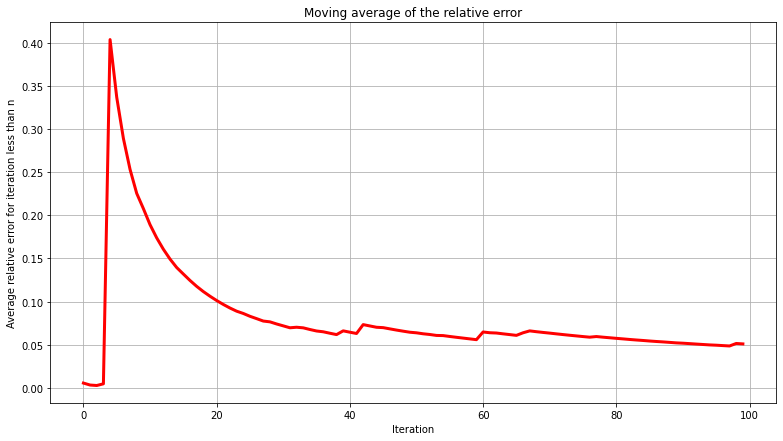

In [53]:
plt.figure(figsize = (13,7))
plt.plot(range(M), relative_error, lw = 3, color = 'r')
plt.xlabel("Iteration")
plt.ylabel("Average relative error for iteration less than n")
plt.title("Moving average of the relative error")
plt.grid(True)
plt.show()

In [56]:
r = 5
M = 300
relative_error = 0.
for i in range(M):
    is_non_singular = False
    while (is_non_singular == False):
        indexes = np.random.choice(A.shape[0], size = (r, 2), replace=False)
        if (is_invertible(A[indexes[:, 0]][:, indexes[:, 1]])):
            is_non_singular = True
    A_r = A[:, indexes[:, 1]] @ np.linalg.inv(A[indexes[:, 0]][:, indexes[:, 1]]) @ A[indexes[:, 0], :]
    relative_error += np.linalg.norm(A - A_r, ord='fro') / np.linalg.norm(A, ord='fro')
relative_error /= M
print(relative_error)

0.046970576865664665


As you should know from the lecture, if $A$ is of rank $r$ and $\hat{A} = A(\mathcal{I} , \mathcal{J})$ is nonsingular, then the exact equality holds. In the approximate case, however, the quality of the approximation depends on the volume of the submatrix $\hat{A}$: 

**Theorem**

*If $\hat{A} = A_{max}$ has maximal in modulus determinant among all $r \times r$ submatrices of $A$, the following error etimate holds:*

$$ \|A - A_r\|_1 \leq (r+1)\sigma_{r+1}.$$


And the question is how to choose a good submatrix of nearly maximal volume in practice.

**Definition**: *We call $r \times r$ submatrix $A_{dom}$ of rectangular $n \times r$ matrix $A$ of
full rank dominant, if all the entries of $AA_{dom}^{-1}$ are not greater than $1$ in
modulus.*

The crucial theoretical result behind the scene is that the volume of any dominant submatrix $A_{dom}$ can not be very much smaller than the maximum volume submatrix $A_{max}$ (without proof).

We provide the following algorithm for constructing dominant submatrix of a tall matrix.

**Algorithm 1**: 
    
Given matrix $A$ of size $n \times r$ finds dominant submatrix of size $r \times r$

__step 0.__ Start with arbitrary nonsingular $r \times r$ submatrix $A_{dom}$. Reorder rows in $A$ so that $A_{dom}$ occupies first $r$ rows in $A$.

__step 1.__ Compute $B = AA_{dom}^{-1}$ and find its maximum in module  entry $b_{ij}$.

__step 2.__ **If $|b_{ij}| > 1 + \delta$, then**:

Swap rows $i$ and $j$ in $B$ (accrodignly in A). By swapping the rows we have increased the volume of the upper submatrix in $B$, as well as in $A$ (why?). Let $A_{dom}$ be the new upper submatrix of $A$ and go to __step 1__.

**elseif $|b_{ij}| < 1 + \delta$**:

return $A_{dom}$.

Note: $\delta = 10^{-2}$ seems to be a good practical choice.

- (10 pts) Implement algorithm 1 according to the following signature, where the function returns ```row_indices``` array which can be used as ```A[row_indices, :]``` to extract selected submatrix.

Note that matrix inverse $A_{dom}^{-1}$ in step 3 has to be updated efficiently using [Shermann-Morison formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) (inverse of rank-1 update).

In [57]:
def Sherman_Morrison(A, u, v):
    return A - (A @ u @ v.T @ A) / (1 + v.T @ A @ u)

In [205]:
def dominant_submatrix_search(A):
    n, r = A.shape[0], A.shape[1]
    is_non_singular = False
    while (is_non_singular == False):
        indices = np.random.choice(n, size = r, replace=False)
        A_dom = A[indices]
        if (is_invertible(A_dom)):
            is_non_singular = True
    
    #complement_index = np.delete(np.arange(0, A.shape[0]), row_indices)
    row_indices = np.hstack((indices, np.delete(np.arange(0, A.shape[0]), indices)))
    #a_1 = A[complement_index]
    #A[:r] = A_dom
    #A[r:] = a_1
    A_dom_inv = np.linalg.inv(A_dom)
    iter_ = 0
    delta = 1
    while (delta > 0.01):
        B = A[row_indices] @ A_dom_inv
        b_max = np.abs(B).max()
        index_b_max = np.abs(B).argmax()
        i, j = index_b_max//r, index_b_max % r
        delta = np.abs(b_max) - 1
        
        e_j = np.eye(r, 1, -j)
        swap_ij = A[row_indices[i]] - A[row_indices[j]]
        swap_ij = swap_ij.reshape(r, 1)
        A_dom_inv = Sherman_Morrison(A_dom_inv, e_j, swap_ij)
        row_indices[[i, j]] = row_indices[[j, i]]
        #print("Iteration", iter_, "delta:", delta)
        #iter_ += 1
        
    return row_indices #row_indices[:r]

In [178]:
# check the convergence of your implementation on random data
r = 10
A_rand = np.random.rand(5000, r)
row_indices = dominant_submatrix_search(A_rand)

Iteration 0 delta: 2.4885311710602975
Iteration 1 delta: 1.2198408279623987
Iteration 2 delta: 1.061529328859589
Iteration 3 delta: 1.014308531146309
Iteration 4 delta: 0.7486604034307154
Iteration 5 delta: 0.5581136479200877
Iteration 6 delta: 0.44431922326331663
Iteration 7 delta: 0.3197327615775385
Iteration 8 delta: 0.2008026773447087
Iteration 9 delta: 0.022285456710226637
Iteration 10 delta: 0.011219643434334792
Iteration 11 delta: 4.440892098500626e-16


- (10 pts) Propose the method to construct Skeleton approximation using Algorithm 1. The signature of the function is provided below.  Compare your algorithm with previously considered random selection on the matrix $A$.

Hint: 

1) start with random selection of columns 

2) if you transpose the matrix for which you find rows, then Algorithm 1 will give you update for columns in the initial matrix

In [238]:
def skeleton(A, r):
    N = A.shape[0]
    is_not_singular = False
    while (is_not_singular == False):
        row_indices = np.random.choice(N, size = r, replace=False)
        if (np.linalg.matrix_rank(A[row_indices]) == r):
            is_not_singular = True  
    #for _ in range(20): 
    column_indices = row_indices
    row_indices = dominant_submatrix_search(A[:, column_indices])
    row_indices = row_indices[:r]
    return row_indices, column_indices

- (3 pts) Compare your ```skeleton``` approximation algorithm with SVD and discuss its pros and cons.

In [239]:
A_rand = np.random.rand(1000, 1000)
row_indices, column_indices = skeleton(A_rand, r=5)
A_r = A_rand[:, column_indices] @ np.linalg.inv(A_rand[row_indices][:, column_indices]) @ A_rand[row_indices, :]
%timeit skeleton(A_rand, r=5)
print(np.linalg.norm(A_rand - A_r, ord='fro') / np.linalg.norm(A_rand, ord='fro'))

19 ms ± 5.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.000686248075780763


In [237]:
U, S, V = np.linalg.svd(A_rand)
%timeit np.linalg.svd(A_rand)
print(np.linalg.norm(A_rand - U @ np.diag(S) @ V, ord='fro') / np.linalg.norm(A_rand, ord='fro'))

7.27 s ± 575 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.500837613585371e-15


##### Skeleton approximation isn't precise, so it has some lost of accuracy, whereas SVD is precise and the accuracy is very high in this case.
##### But Skeleton works much faster and this gap in time performance significantly increases with enlarginf of size of matrix.
##### We can also notice that obvious fact that choice of dominant submatrix gives far more stable approximation than random choice of indices.